Import Library

In [378]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score

Import Dataset Province Bali Minimum Wage

In [361]:
df = pd.read_excel('datasets/minimum_wage.xlsx')
df

,regency,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Kab. Jembrana,309750.0,341000.0,432650.0,455300.0,532700,675000,737500,812500,875000,...,1000000,1212500,1542600,1662500,NaN,2006617,2181393,2356559,2557102,2557102
1,Kab. Tabanan,NaN,NaN,NaN,NaN,530000,622054,685000,777000,854500,...,1005000,1250000,1542600,1706700,1902970.0,2059965,2239500,2419332,2625217,2625217
2,Kab. Badung,345000.0,385000.0,469000.0,506500.0,582000,705000,805000,950000,1110000,...,1290000,1401000,1728000,1905000,2124075.0,2299311,2499581,2700297,2930093,2930093
3,Kab. Gianyar,320000.0,345000.0,446265.0,475000.0,540000,650000,760000,842500,925000,...,1104000,1230000,1543000,1707750,1904141.0,2061233,2240766,2421000,2627000,2627000
4,Kab. Klungkung,NaN,NaN,NaN,NaN,521000,625000,686000,767000,835800,...,995000,1190000,1545000,1650000,1839750.0,1991529,2164992,2338840,2538000,2538000
5,Kab. Bangli,NaN,NaN,NaN,450000.0,522000,625000,685000,760500,829500,...,970000,1182000,1542600,1622000,1808530.0,1957734,2128253,2299152,2494810,2494810
6,Kab. Karangasem,NaN,NaN,NaN,NaN,515000,636000,712320,815606,875000,...,1039600,1195000,1542600,1700000,1895500.0,2051879,2180000,2355054,2555469,2555469
7,Kab. Buleleng,NaN,NaN,NaN,NaN,510000,623000,685000,765000,830000,...,975000,1200000,1542600,1650000,1839750.0,1991529,2165000,2338850,2538000,2538000
8,Kota Denpasar,309750.0,385000.0,465000.0,500000.0,567500,698500,800000,952000,1100000,...,1259000,1358000,1656900,1800000,2007000.0,2173000,2363000,2553000,2770300,2770300
9,Provinsi Bali,309750.0,341000.0,425000.0,447500.0,510000,622000,682650,760000,829316,...,967500,1181000,1542600,1621172,1807600.0,1956727,2127157,2297969,2493523,2493523


Check data type each column

In [362]:
df.dtypes

regency     object
2002       float64
2003       float64
2004       float64
2005       float64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
2014         int64
2015         int64
2016       float64
2017         int64
2018         int64
2019         int64
2020         int64
2021         int64
dtype: object

Check Null Value of each column

In [363]:
df.isna().sum()

regency    0
2002       5
2003       5
2004       5
2005       4
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       1
2017       0
2018       0
2019       0
2020       0
2021       0
dtype: int64

Fill Null Wage Value with mean of year of wage

In [364]:
#create mean value of each year with null value
mean_value_02 = round(df['2002'].mean(), 0)
mean_value_03 = round(df['2003'].mean(), 0)
mean_value_04 = round(df['2004'].mean(), 0)
mean_value_05 = round(df['2005'].mean(), 0)
mean_value_16 = round(df['2016'].mean(), 0)

#fill null value with mean of year wage
df['2002'].fillna(value=mean_value_02, inplace=True)
df['2003'].fillna(value=mean_value_03, inplace=True)
df['2004'].fillna(value=mean_value_04, inplace=True)
df['2005'].fillna(value=mean_value_05, inplace=True)
df['2016'].fillna(value=mean_value_16, inplace=True)
df

,regency,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Kab. Jembrana,309750.0,341000.0,432650.0,455300.0,532700,675000,737500,812500,875000,...,1000000,1212500,1542600,1662500,1903257.0,2006617,2181393,2356559,2557102,2557102
1,Kab. Tabanan,318850.0,359400.0,447583.0,472383.0,530000,622054,685000,777000,854500,...,1005000,1250000,1542600,1706700,1902970.0,2059965,2239500,2419332,2625217,2625217
2,Kab. Badung,345000.0,385000.0,469000.0,506500.0,582000,705000,805000,950000,1110000,...,1290000,1401000,1728000,1905000,2124075.0,2299311,2499581,2700297,2930093,2930093
3,Kab. Gianyar,320000.0,345000.0,446265.0,475000.0,540000,650000,760000,842500,925000,...,1104000,1230000,1543000,1707750,1904141.0,2061233,2240766,2421000,2627000,2627000
4,Kab. Klungkung,318850.0,359400.0,447583.0,472383.0,521000,625000,686000,767000,835800,...,995000,1190000,1545000,1650000,1839750.0,1991529,2164992,2338840,2538000,2538000
5,Kab. Bangli,318850.0,359400.0,447583.0,450000.0,522000,625000,685000,760500,829500,...,970000,1182000,1542600,1622000,1808530.0,1957734,2128253,2299152,2494810,2494810
6,Kab. Karangasem,318850.0,359400.0,447583.0,472383.0,515000,636000,712320,815606,875000,...,1039600,1195000,1542600,1700000,1895500.0,2051879,2180000,2355054,2555469,2555469
7,Kab. Buleleng,318850.0,359400.0,447583.0,472383.0,510000,623000,685000,765000,830000,...,975000,1200000,1542600,1650000,1839750.0,1991529,2165000,2338850,2538000,2538000
8,Kota Denpasar,309750.0,385000.0,465000.0,500000.0,567500,698500,800000,952000,1100000,...,1259000,1358000,1656900,1800000,2007000.0,2173000,2363000,2553000,2770300,2770300
9,Provinsi Bali,309750.0,341000.0,425000.0,447500.0,510000,622000,682650,760000,829316,...,967500,1181000,1542600,1621172,1807600.0,1956727,2127157,2297969,2493523,2493523


Convert Data Type of Columns

In [365]:
df[['2002','2003','2004','2005','2005', '2016']].astype('int64')
df['regency'].astype('category')
df.dtypes

regency     object
2002       float64
2003       float64
2004       float64
2005       float64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
2014         int64
2015         int64
2016       float64
2017         int64
2018         int64
2019         int64
2020         int64
2021         int64
dtype: object

<h2>Encode Categorical Features</h2>

In [366]:
#encode regency because this features categorical variable and model machine learning only allow number
ordinal_map = {'Provinsi Bali':1,
               'Kab. Badung':2,
               'Kota Denpasar':3,
               'Kab. Buleleng':4,
               'Kab. Karangasem':5,
               'Kab. Bangli':6,
               'Kab. Gianyar':7,
               'Kab. Tabanan':8,
               'Kab. Jembrana':9,
               'Kab. Klungkung':10
}

df['regency_new'] = df.regency.map(ordinal_map)
df=df.drop(['regency'],axis=1)
df.sort_values(by='regency_new', ascending=True)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,regency_new
9,309750.0,341000.0,425000.0,447500.0,510000,622000,682650,760000,829316,890000,...,1181000,1542600,1621172,1807600.0,1956727,2127157,2297969,2493523,2493523,1
2,345000.0,385000.0,469000.0,506500.0,582000,705000,805000,950000,1110000,1221000,...,1401000,1728000,1905000,2124075.0,2299311,2499581,2700297,2930093,2930093,2
8,309750.0,385000.0,465000.0,500000.0,567500,698500,800000,952000,1100000,1191500,...,1358000,1656900,1800000,2007000.0,2173000,2363000,2553000,2770300,2770300,3
7,318850.0,359400.0,447583.0,472383.0,510000,623000,685000,765000,830000,895000,...,1200000,1542600,1650000,1839750.0,1991529,2165000,2338850,2538000,2538000,4
6,318850.0,359400.0,447583.0,472383.0,515000,636000,712320,815606,875000,953750,...,1195000,1542600,1700000,1895500.0,2051879,2180000,2355054,2555469,2555469,5
5,318850.0,359400.0,447583.0,450000.0,522000,625000,685000,760500,829500,893000,...,1182000,1542600,1622000,1808530.0,1957734,2128253,2299152,2494810,2494810,6
3,320000.0,345000.0,446265.0,475000.0,540000,650000,760000,842500,925000,1003625,...,1230000,1543000,1707750,1904141.0,2061233,2240766,2421000,2627000,2627000,7
1,318850.0,359400.0,447583.0,472383.0,530000,622054,685000,777000,854500,910000,...,1250000,1542600,1706700,1902970.0,2059965,2239500,2419332,2625217,2625217,8
0,309750.0,341000.0,432650.0,455300.0,532700,675000,737500,812500,875000,927500,...,1212500,1542600,1662500,1903257.0,2006617,2181393,2356559,2557102,2557102,9
4,318850.0,359400.0,447583.0,472383.0,521000,625000,686000,767000,835800,927000,...,1190000,1545000,1650000,1839750.0,1991529,2164992,2338840,2538000,2538000,10


Explore Correlation Of Each Features and Label

<AxesSubplot:>

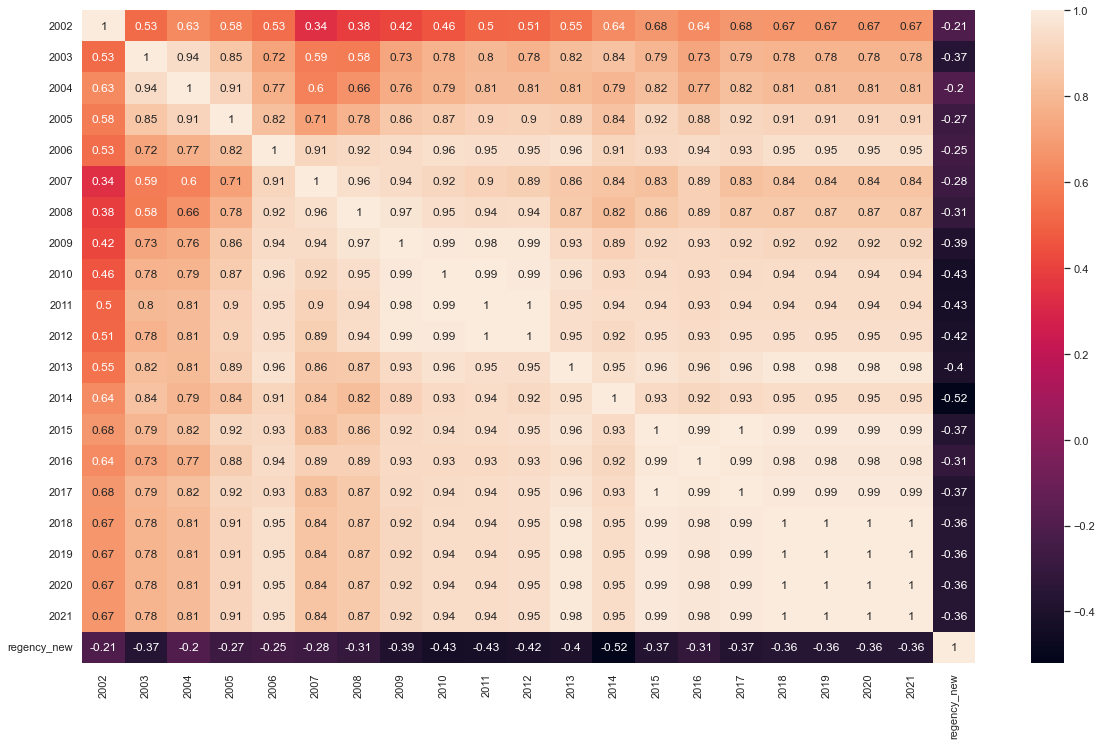

In [367]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(df.corr(method='pearson'),annot=True)

<h2>Define X and y</h2>

In [368]:
X = df.drop(['2021'], axis=1)
y = df['2021']

#split train and test and data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [381]:
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('MSE : ',mean_squared_error(y_test, y_pred))
print('Accuracy of This Regression :',round(ridge.score(X_test, y_test) * 100), '%')
scores = cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')
scores=-1*scores
print(np.sqrt(scores))
print(np.sqrt(scores).mean())

MAE :  11470.725230176002
MSE :  193096911.46669924
Accuracy of This Regression : 98 %
[  467.98157455   825.80122819  7807.40889875  9241.82024876
   748.67566096  1400.44036239 19282.05840936  1124.40622453
  7924.62173892    73.50698635]
4889.672133275633


/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/adikusuma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will